<br>NAMA : NURUL HADI<br>
<br>NIM : 211351109<br>
<br>KELAS : INFORMATIKA MALAM A<br>

# IMPORT DATASET

In [46]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"nurulhadiiiiiiiii","key":"ed4e07c79d9c104793dc9dcd14961868"}'}

In [47]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [48]:
!kaggle datasets download -d arjunbhasin2013/ccdata

ccdata.zip: Skipping, found more recently modified local copy (use --force to force download)


In [49]:
!mkdir ccdata
!unzip ccdata.zip -d ccdata
!ls ccdata

mkdir: cannot create directory ‘ccdata’: File exists
Archive:  ccdata.zip
replace ccdata/CC GENERAL.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
'CC GENERAL.csv'


# IMPORT LIBRARY YANG DIGUNAKAN

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")

In [51]:
df =pd.read_csv('/content/ccdata/CC GENERAL.csv')

# DATA DISCOVERY

In [52]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [54]:
df.describe().T.style.background_gradient(cmap = 'Spectral')

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.000000,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.138560
BALANCE_FREQUENCY,8950.000000,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,8950.000000,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.570000
ONEOFF_PURCHASES,8950.000000,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.250000
INSTALLMENTS_PURCHASES,8950.000000,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.000000
CASH_ADVANCE,8950.000000,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.211760
PURCHASES_FREQUENCY,8950.000000,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.000000,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.000000,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.000000,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.500000


In [55]:
df.shape

(8950, 18)

# EDA

In [56]:
pip install sweetviz

                                             |          | [  0%]   00:00 -> (? left)


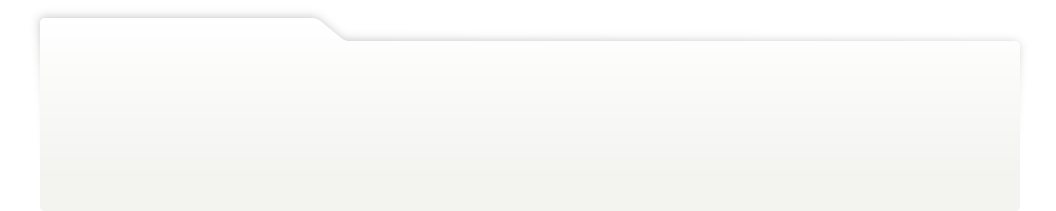
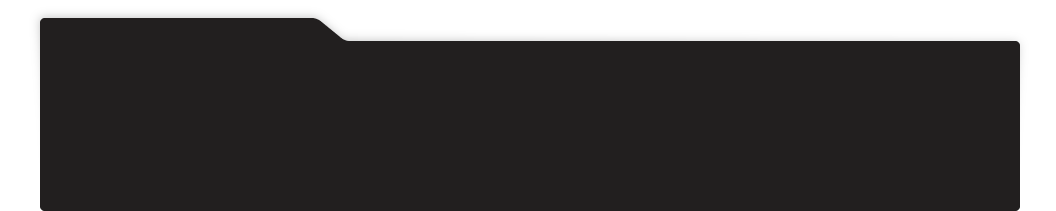
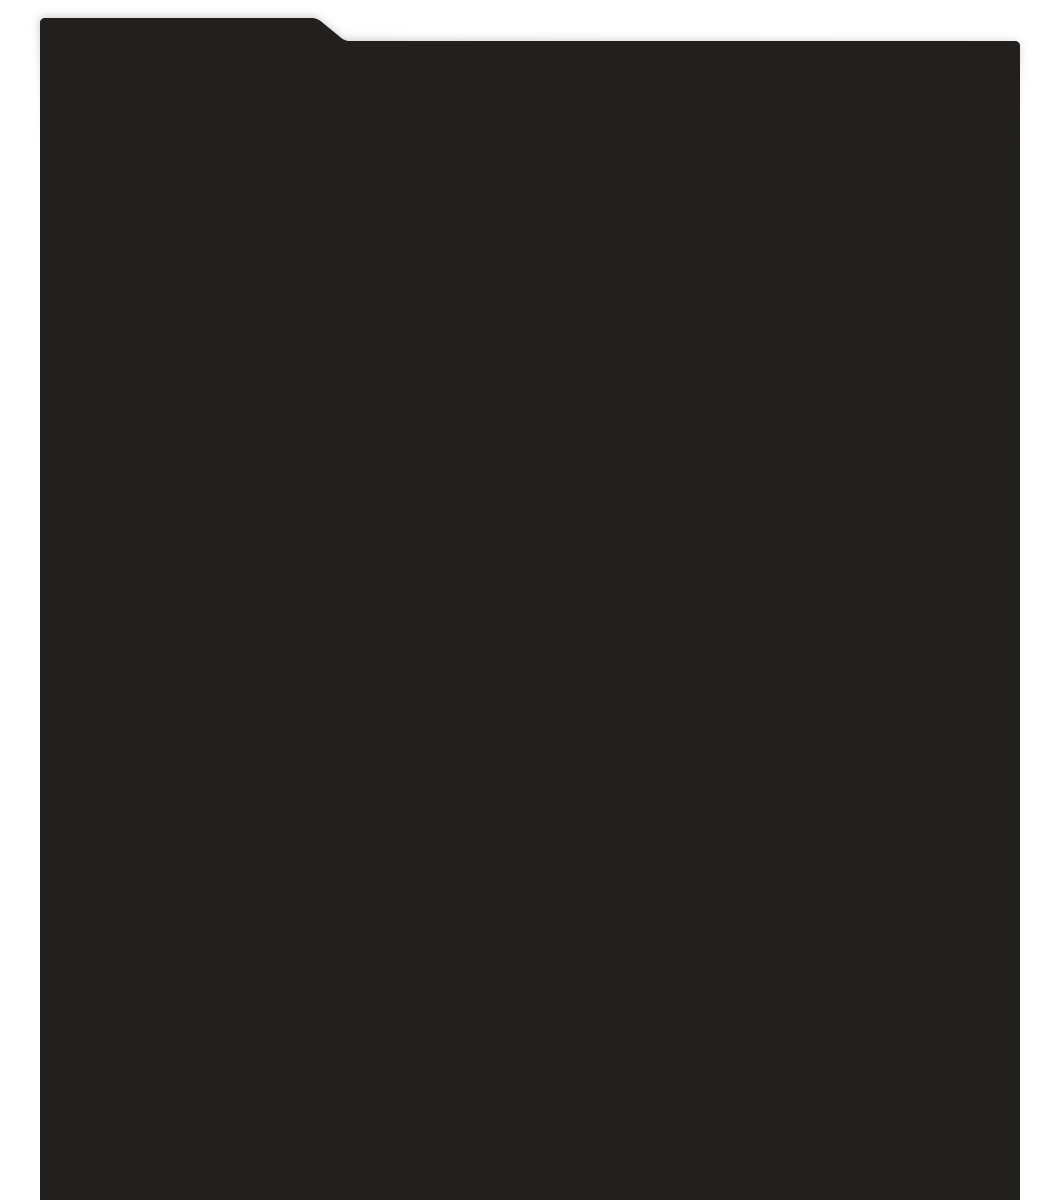
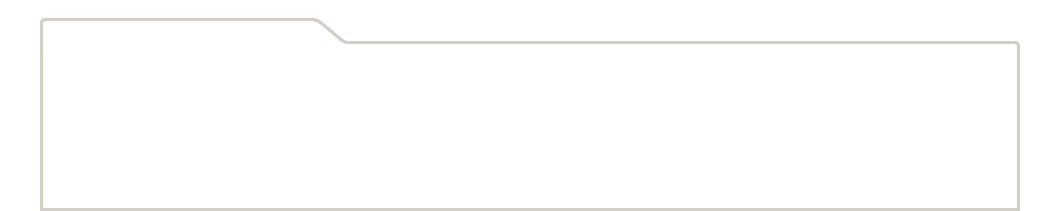
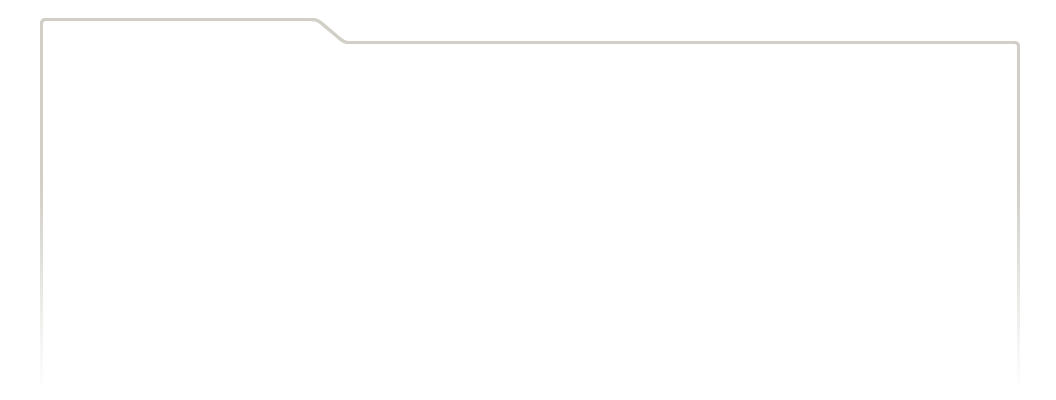
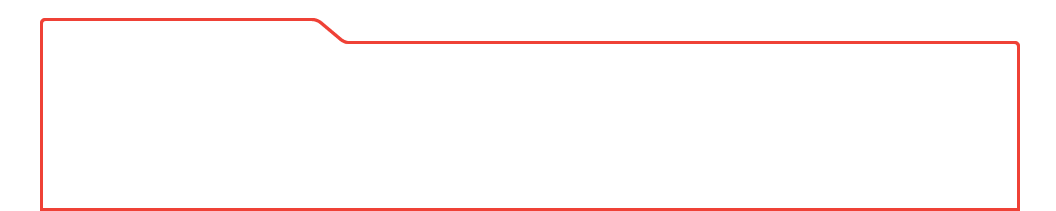
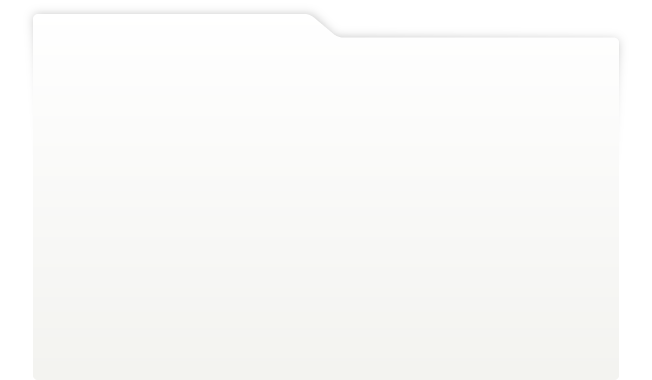
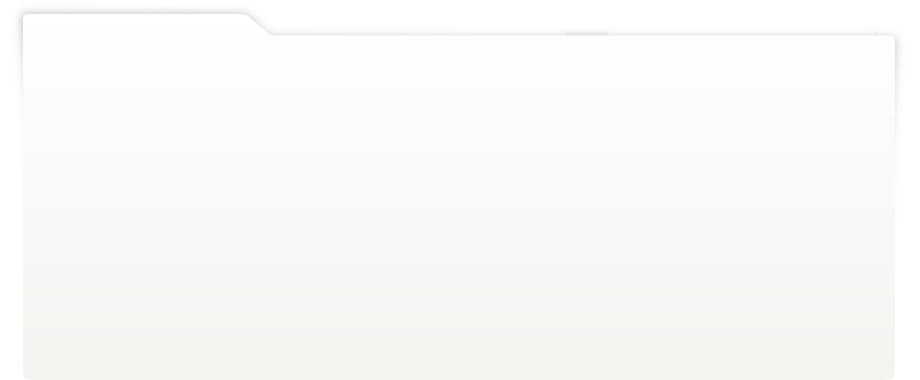
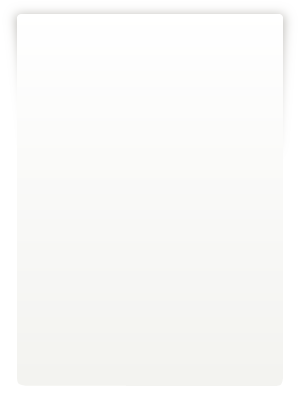
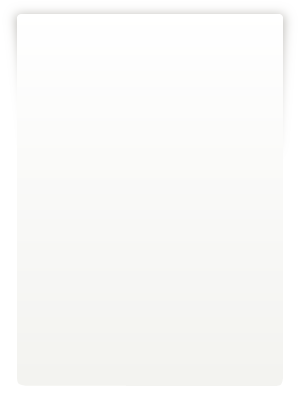
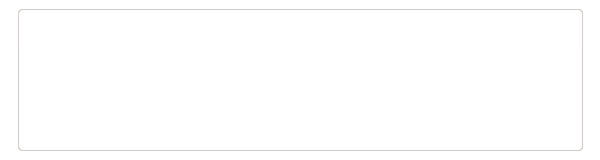
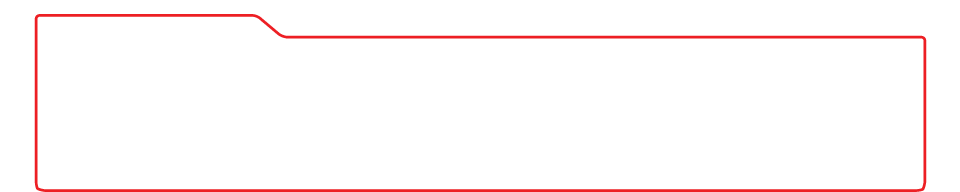
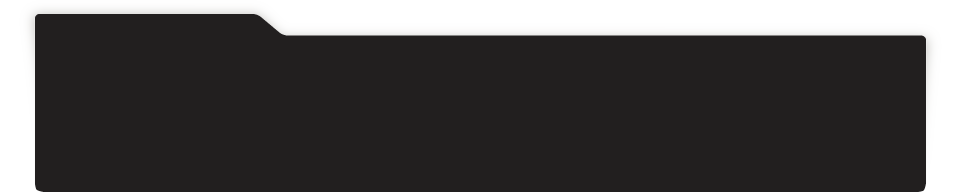
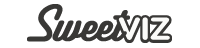
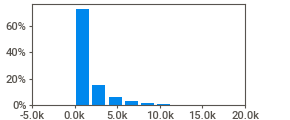
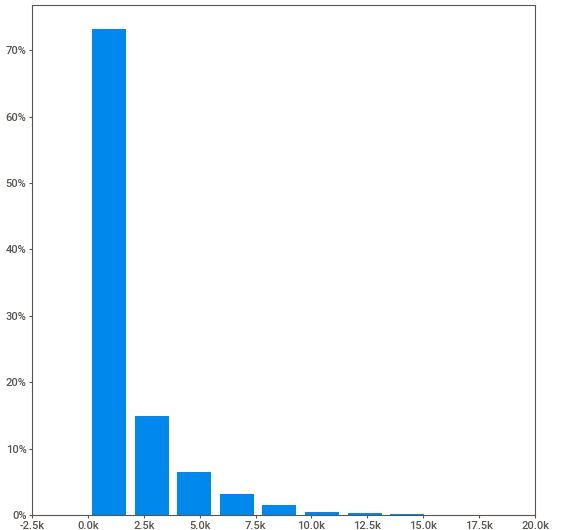
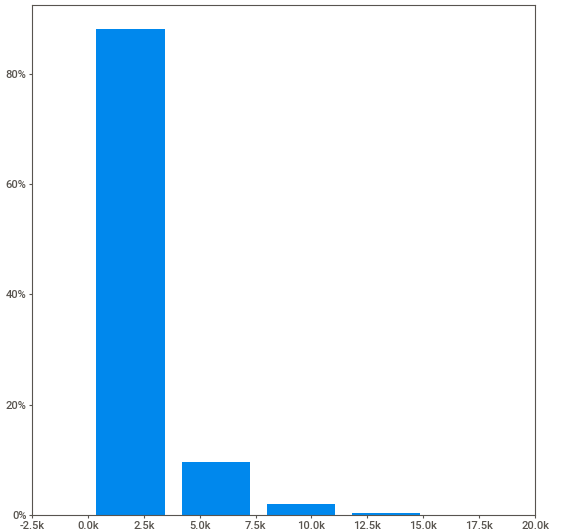
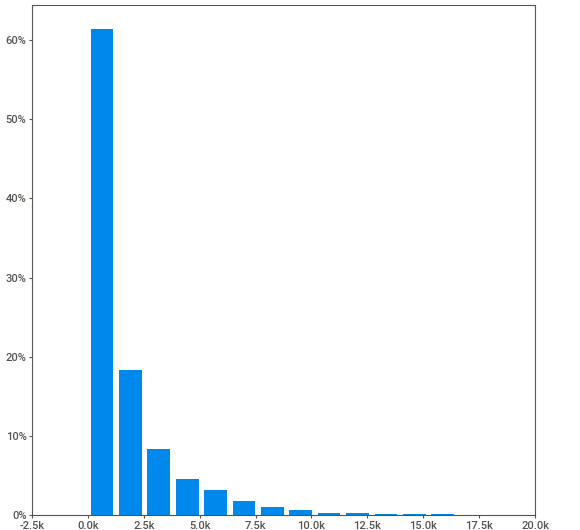
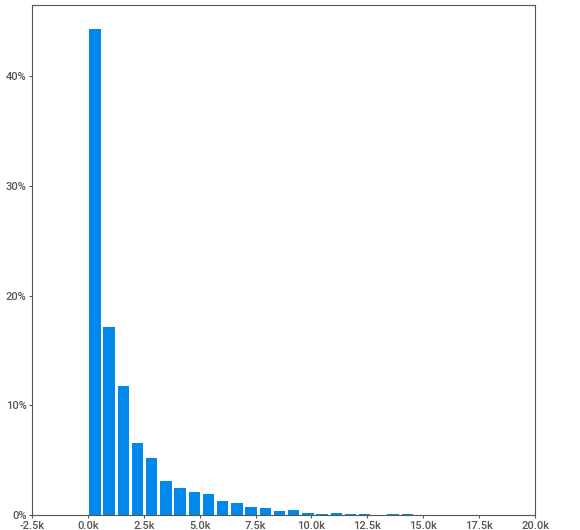
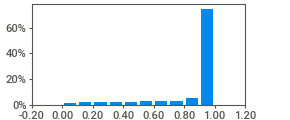
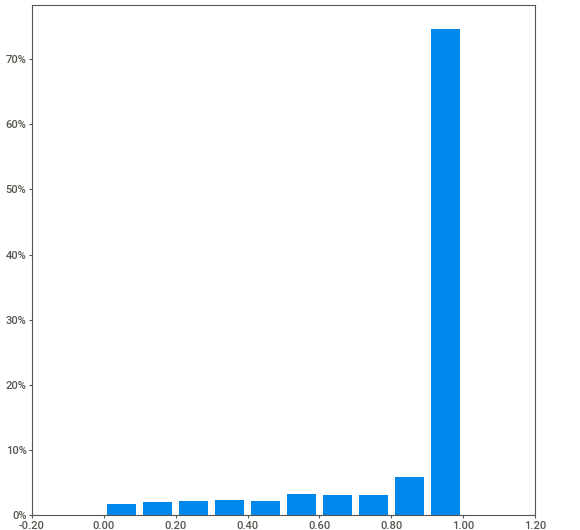
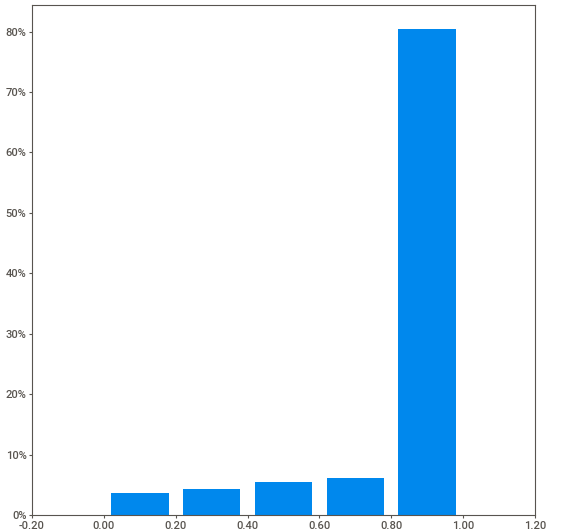
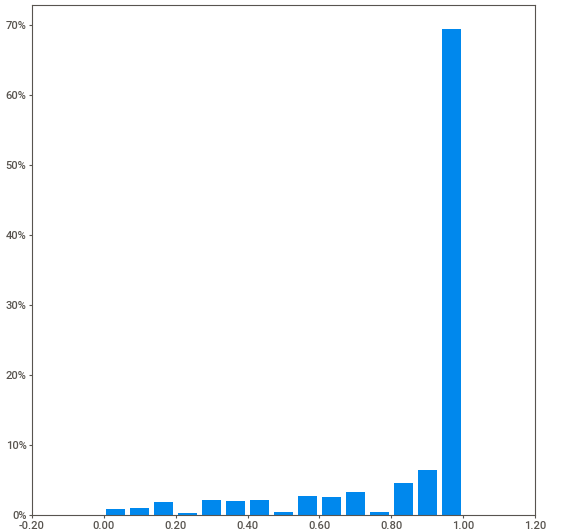
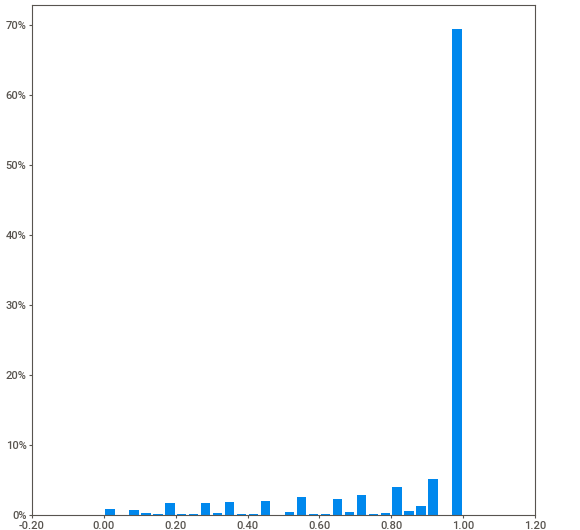
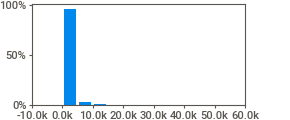
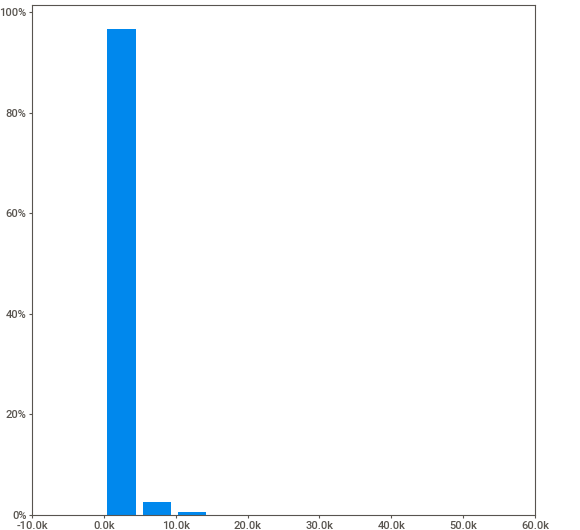
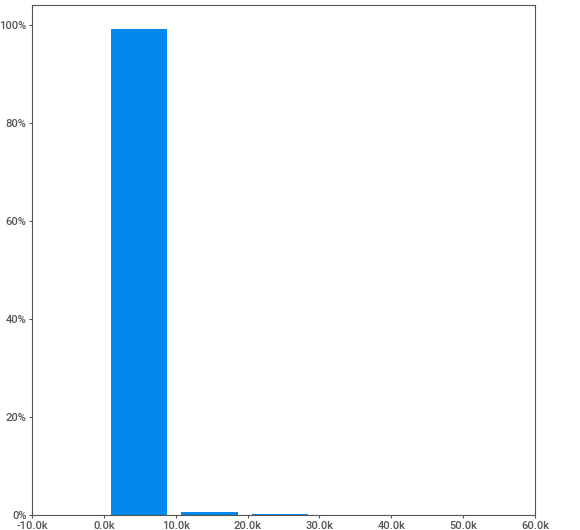
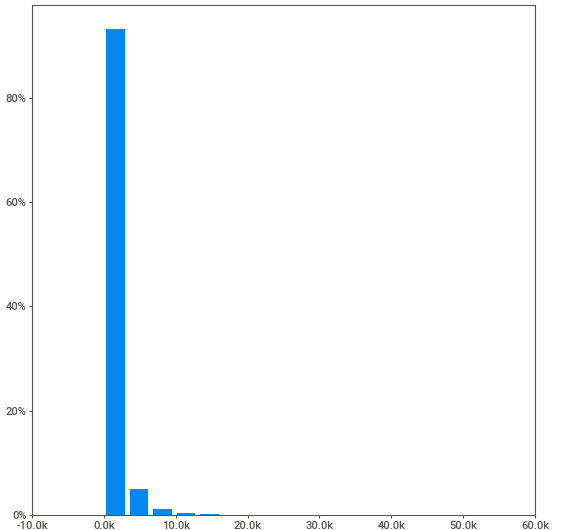
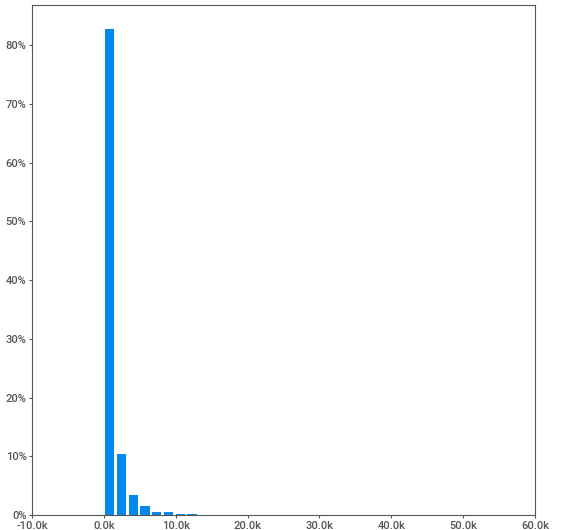
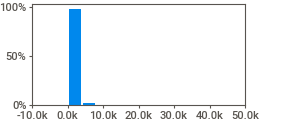
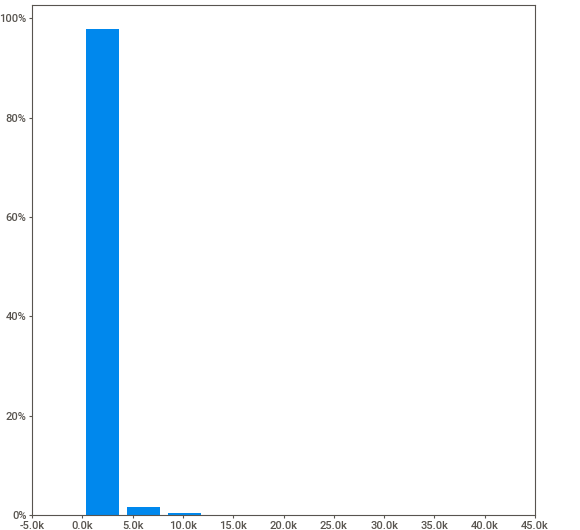
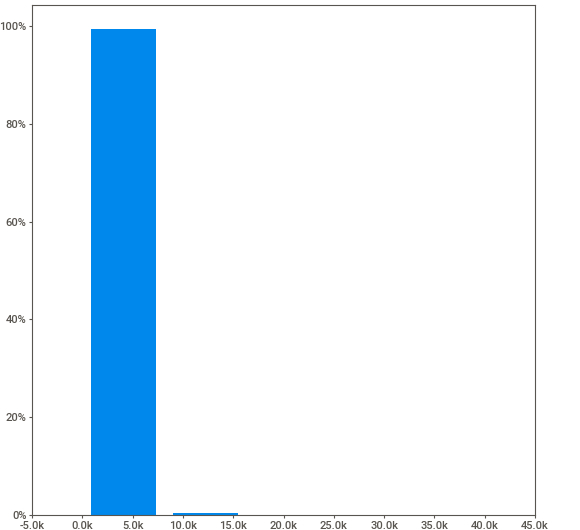
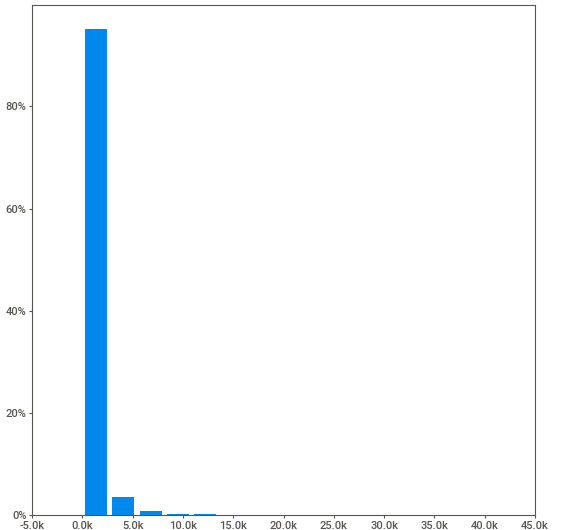
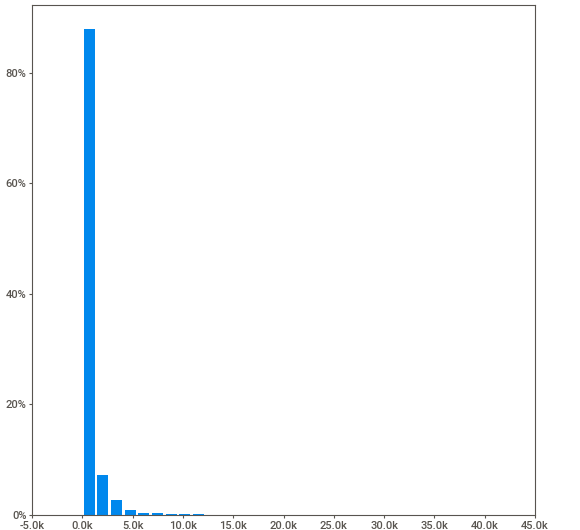
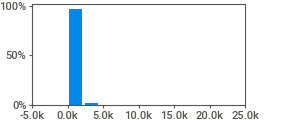
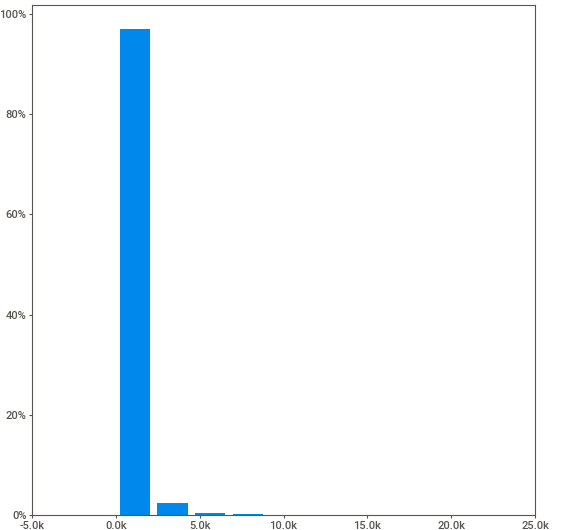
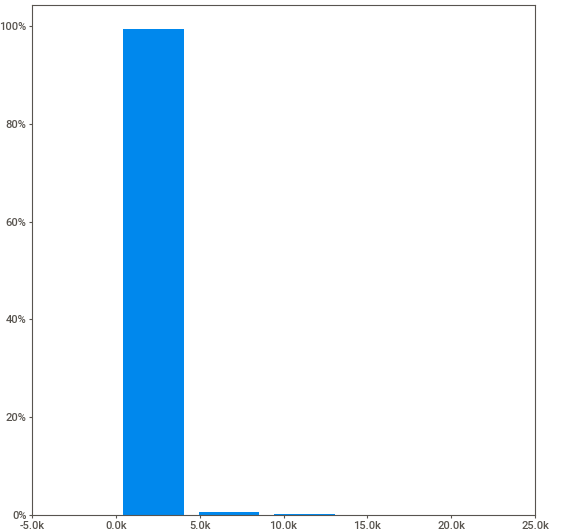
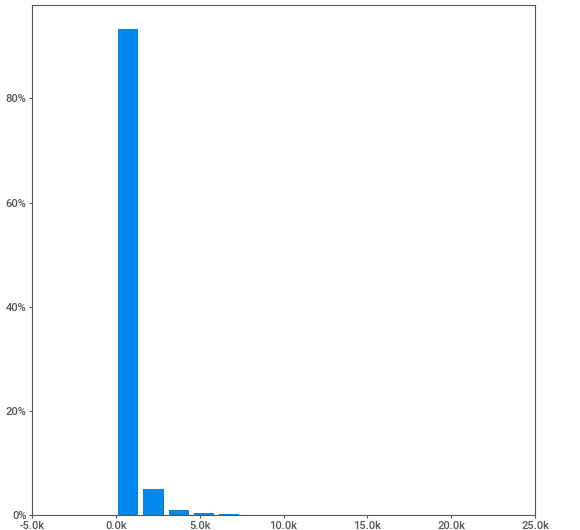
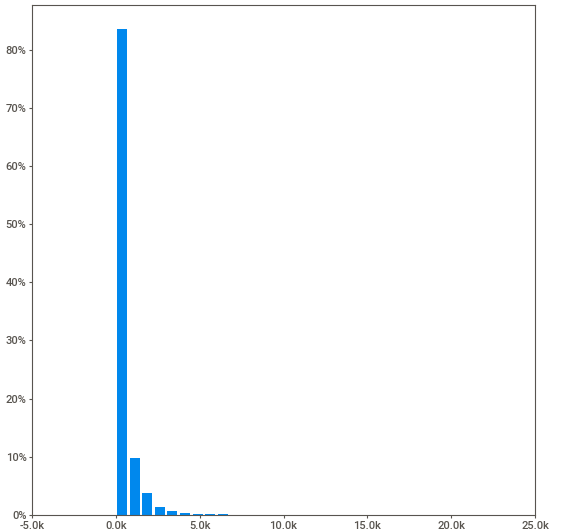
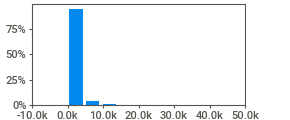
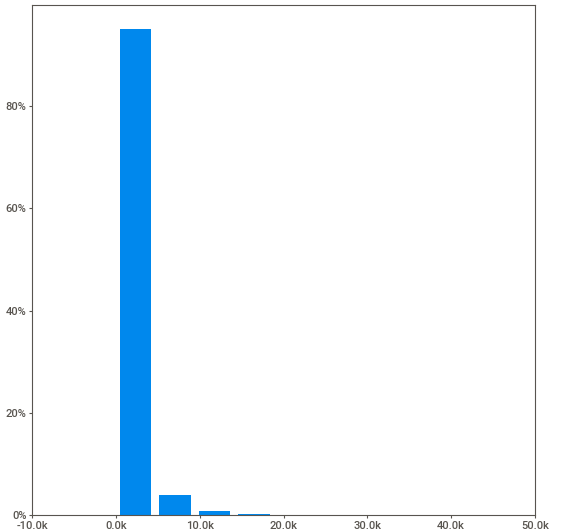
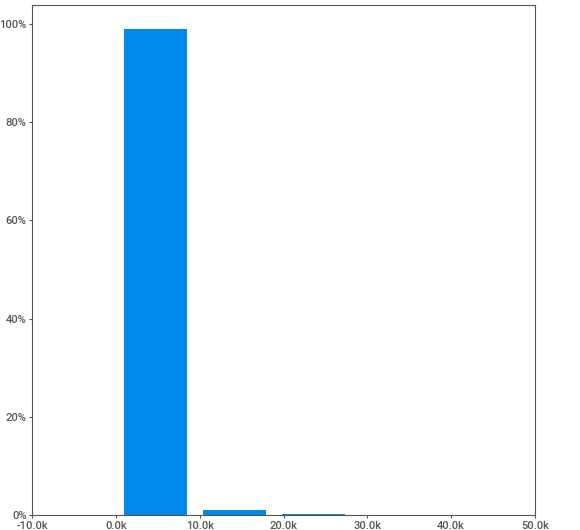
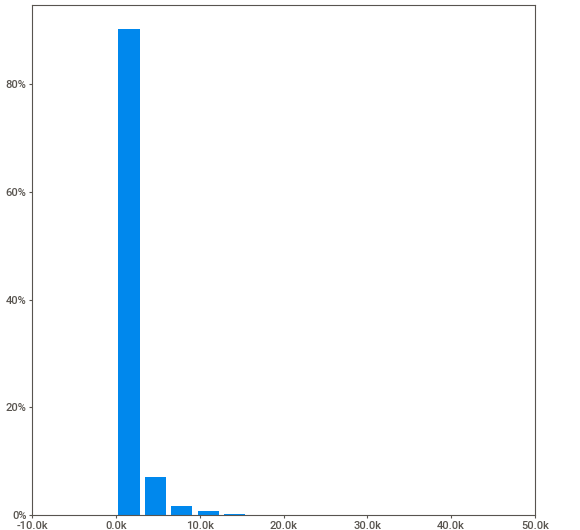
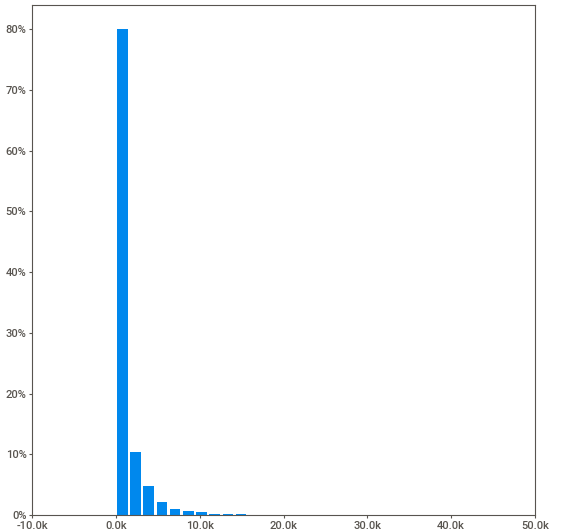
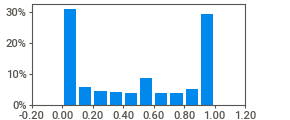
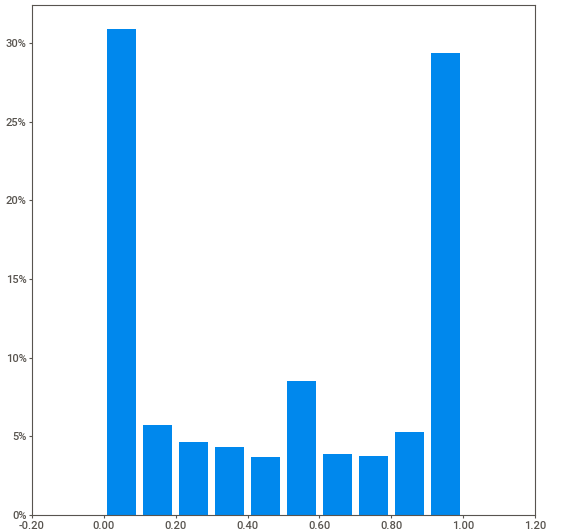
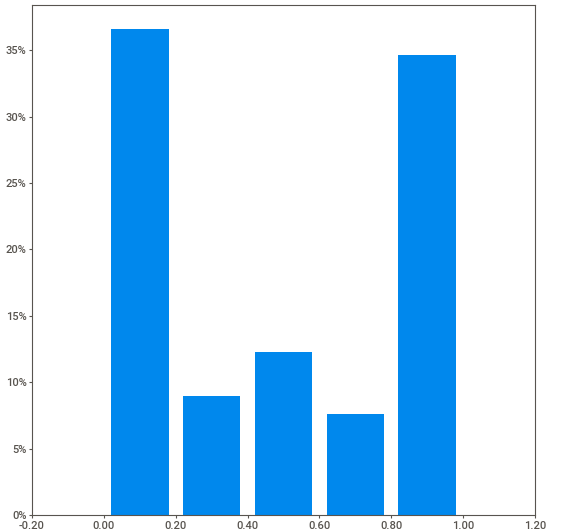
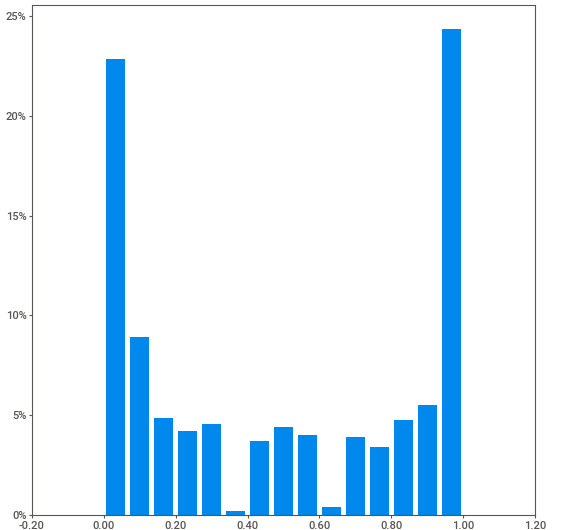
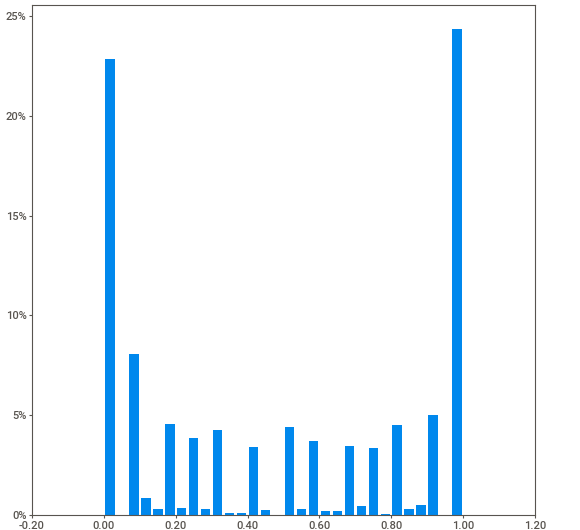
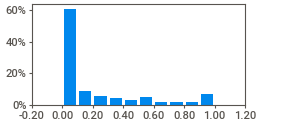
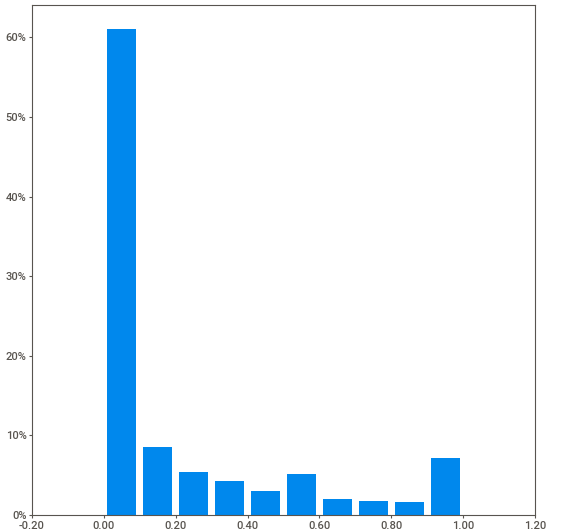
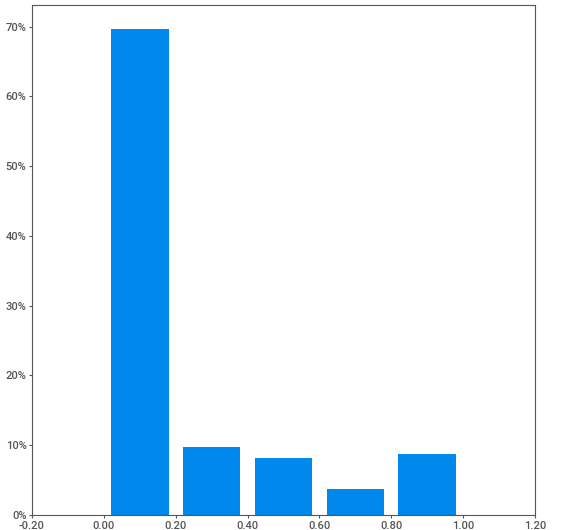
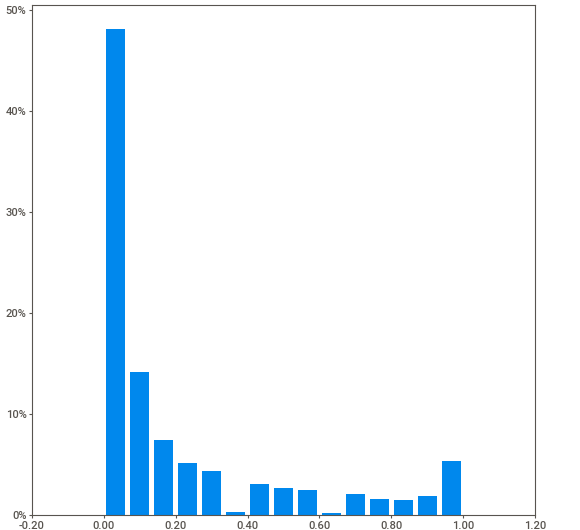
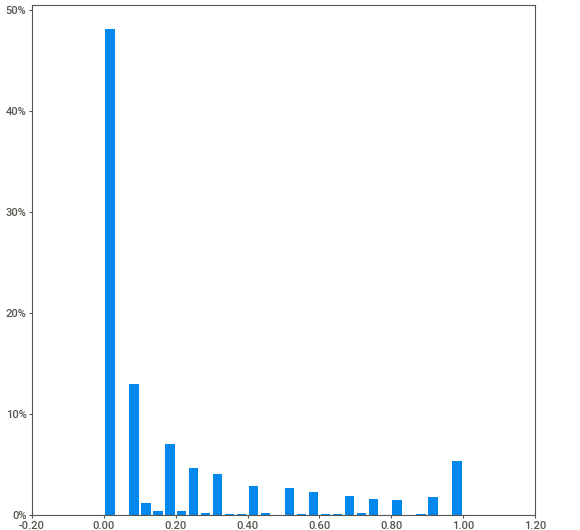
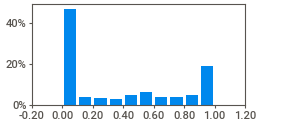
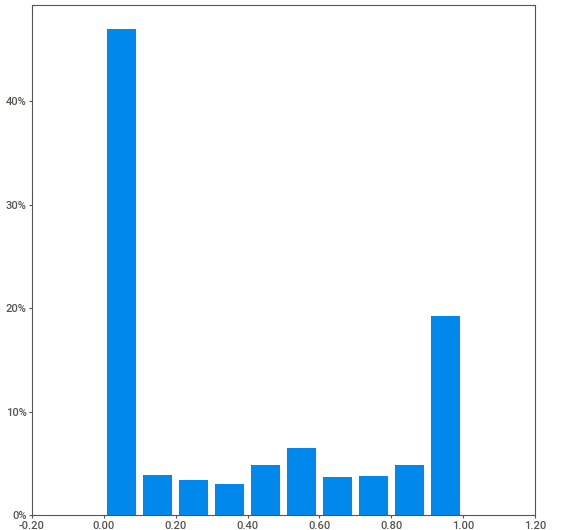
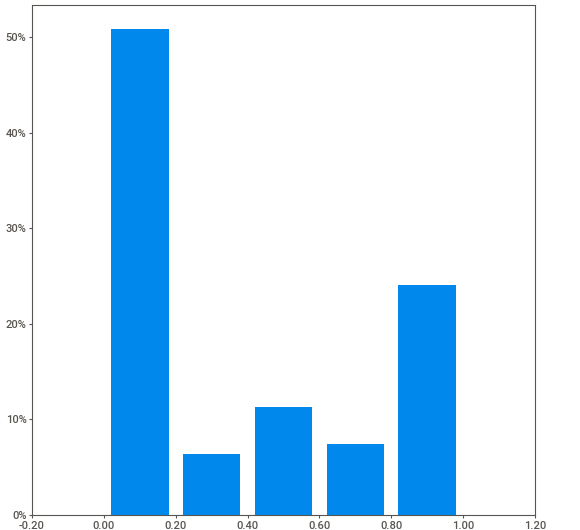
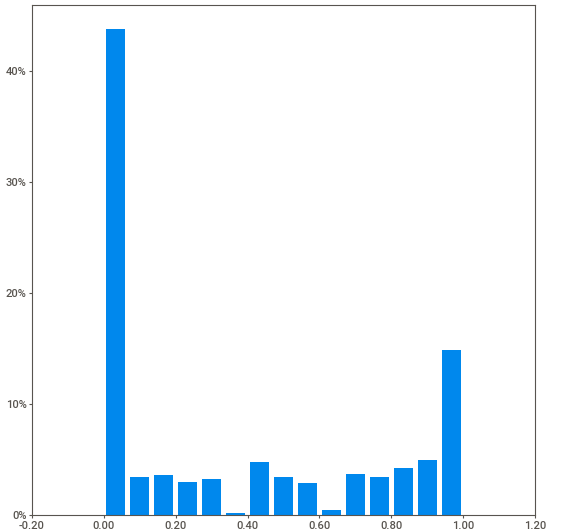
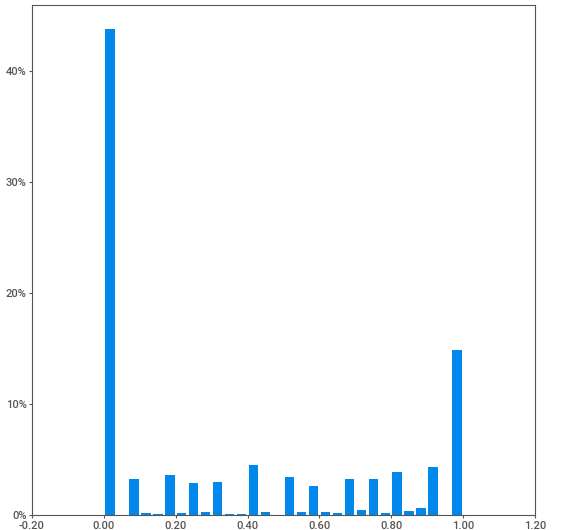
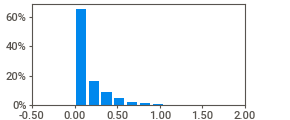
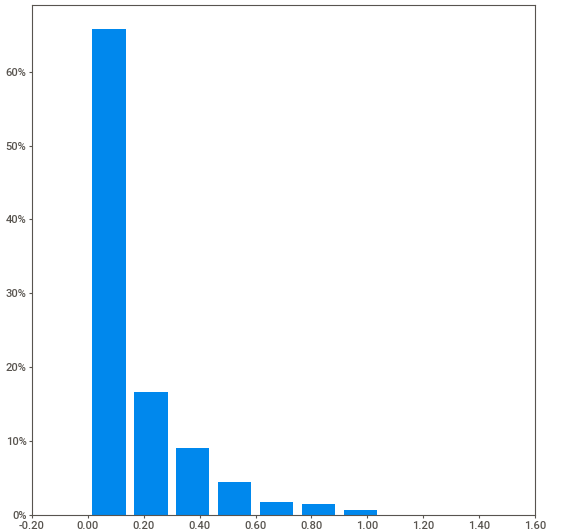
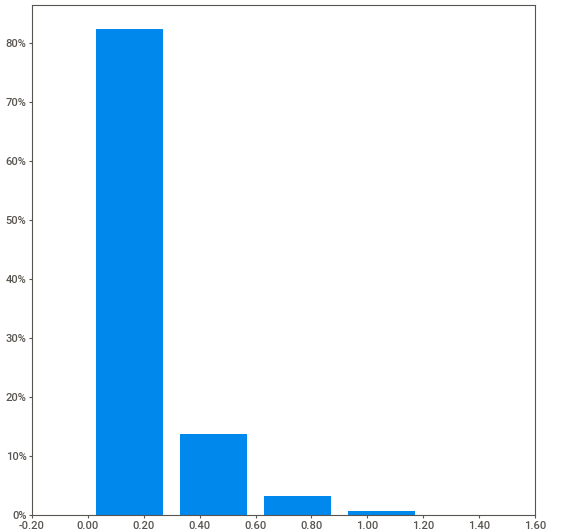
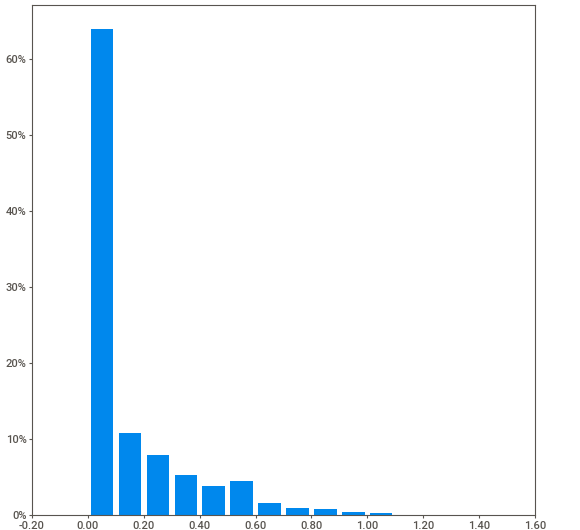
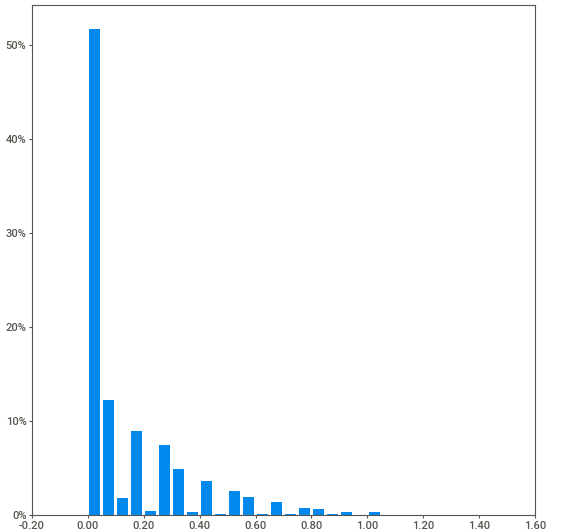
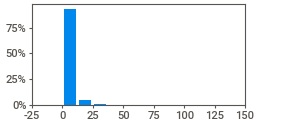
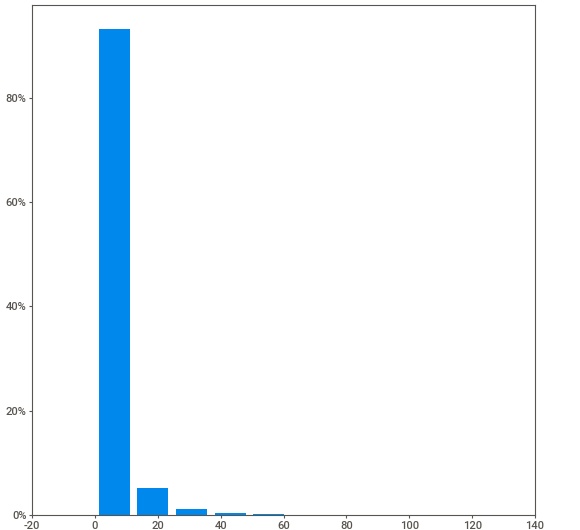
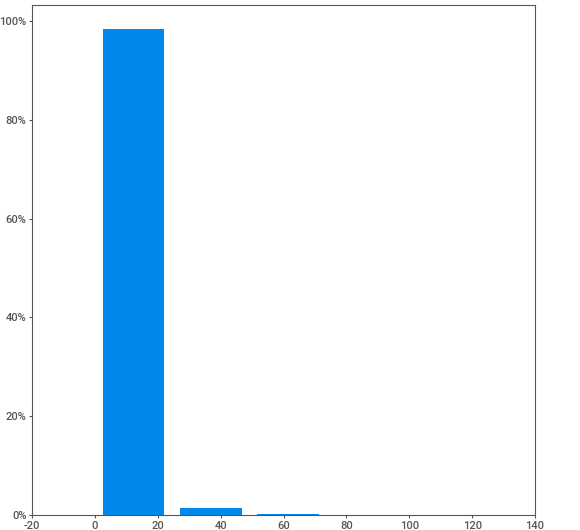
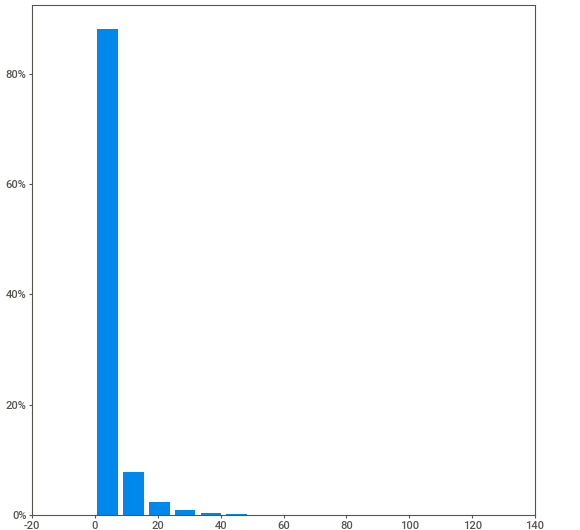
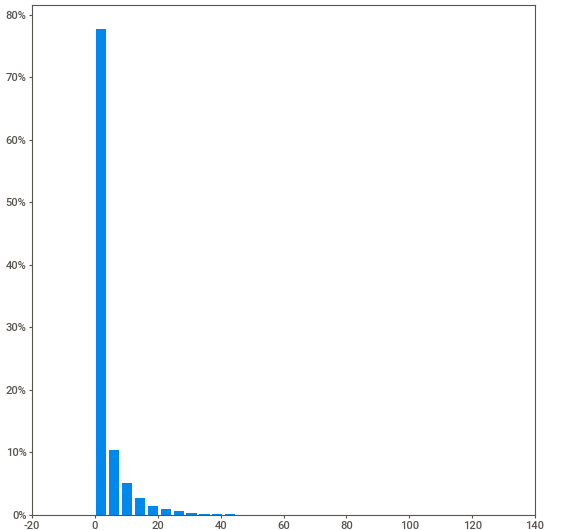
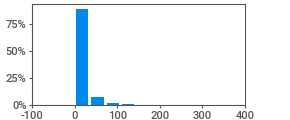
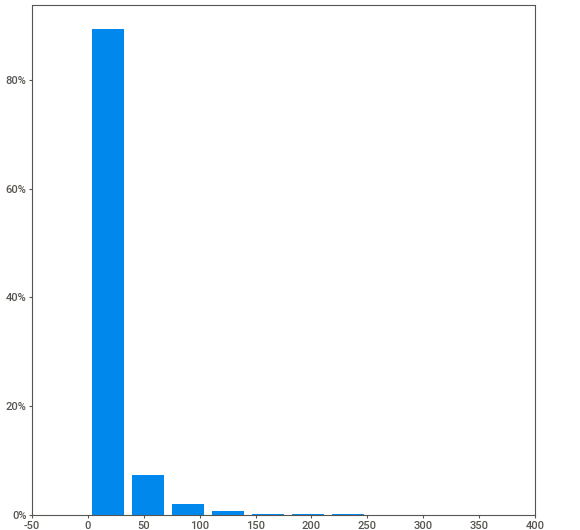
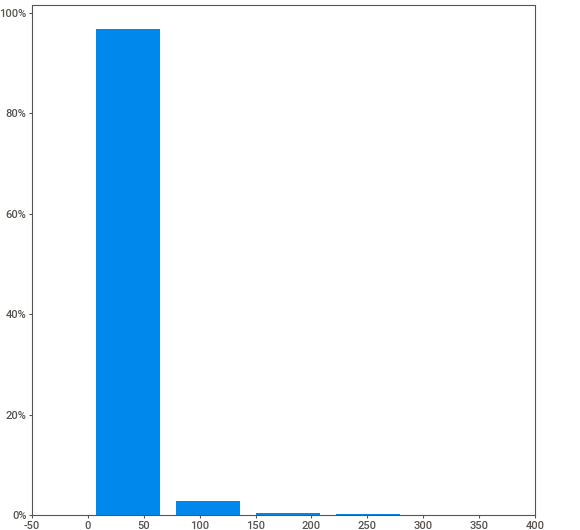
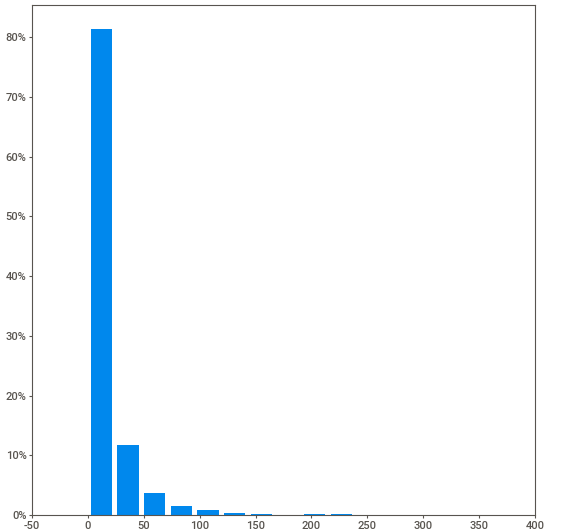
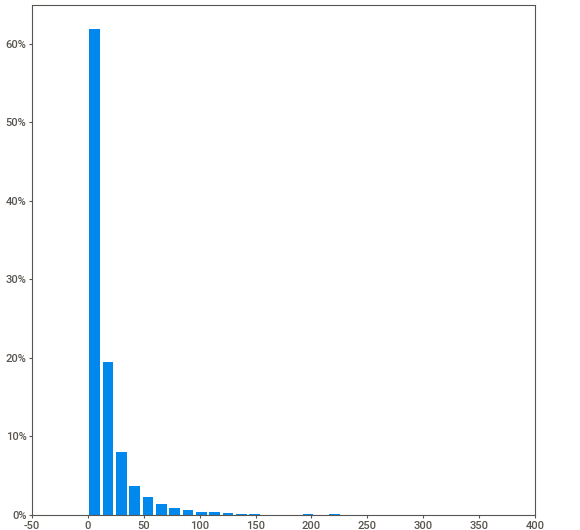
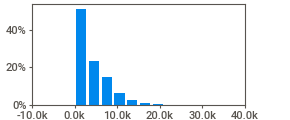
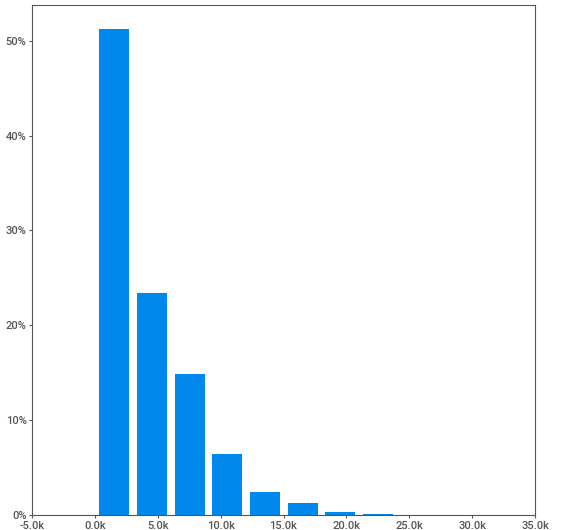
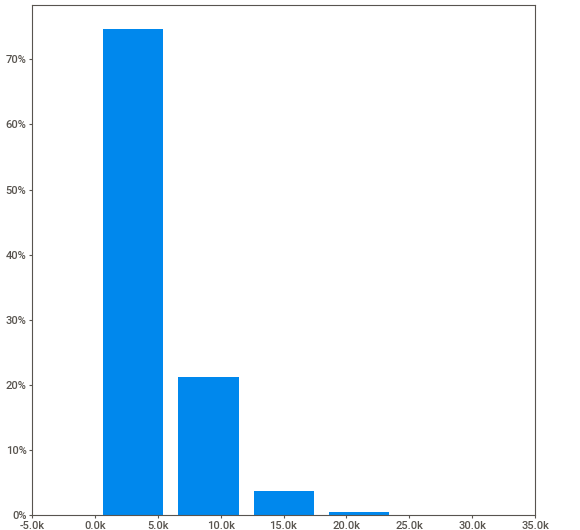
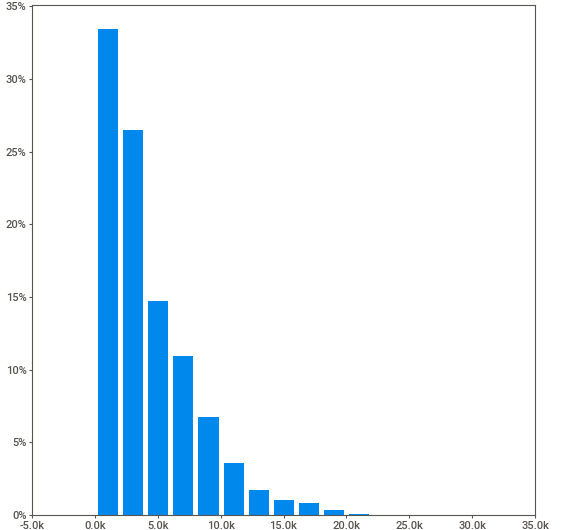
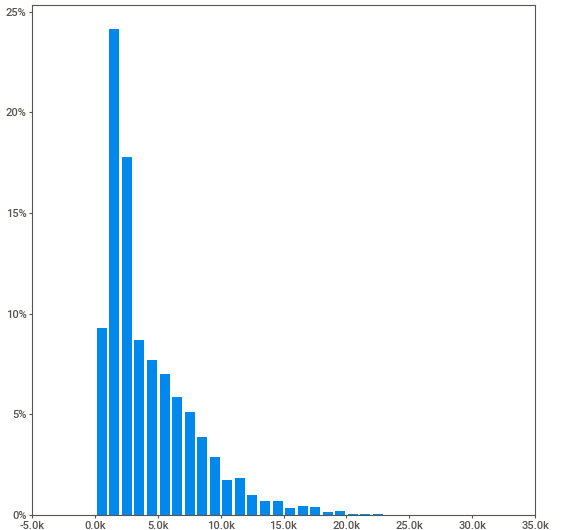
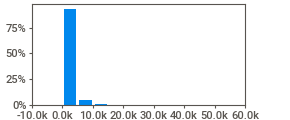
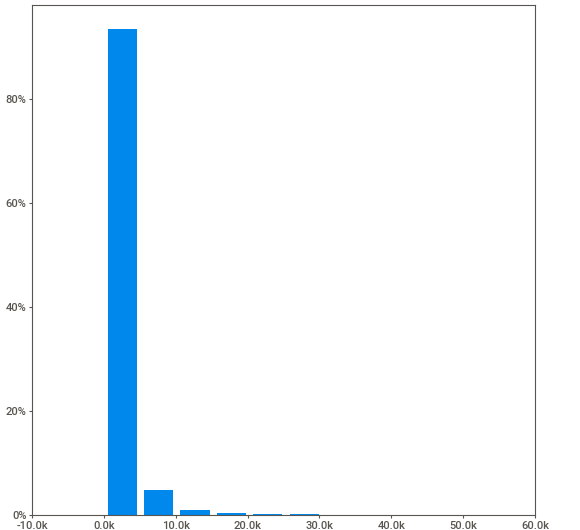
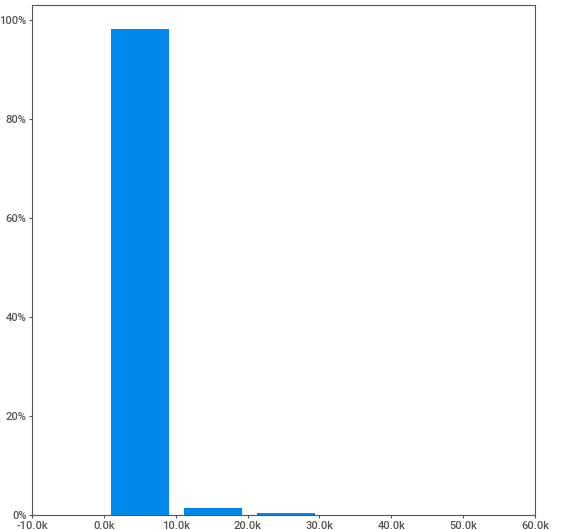
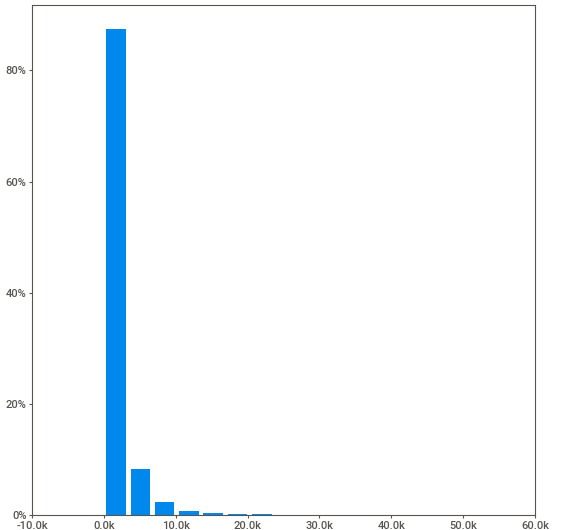
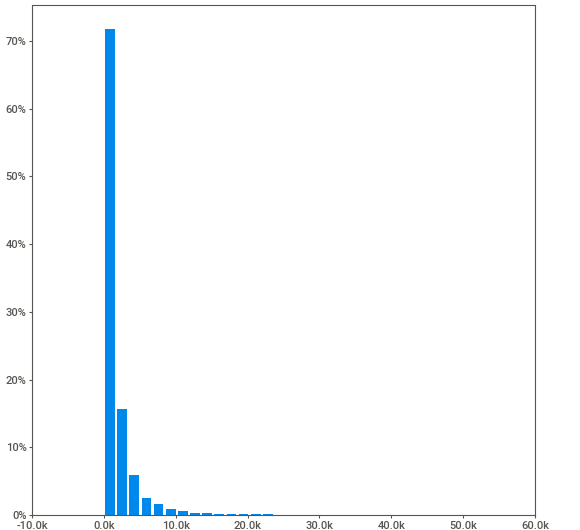
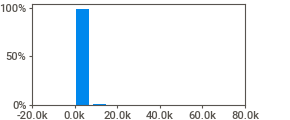
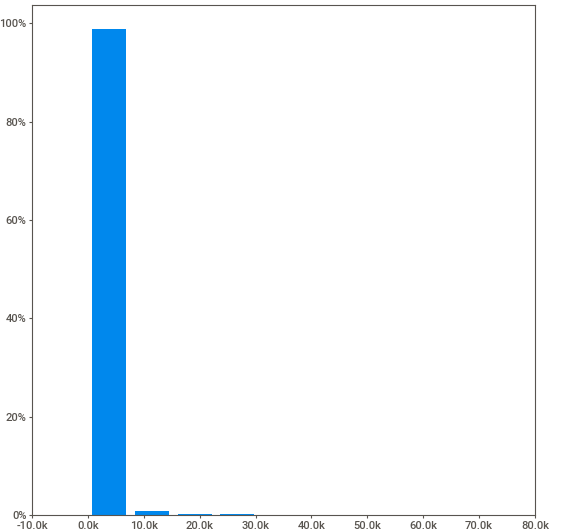
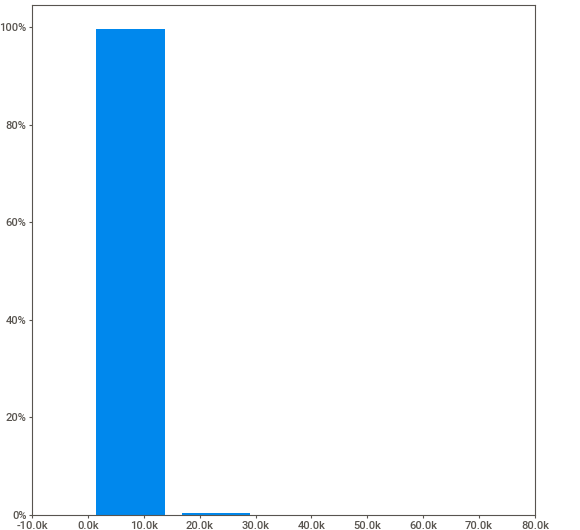
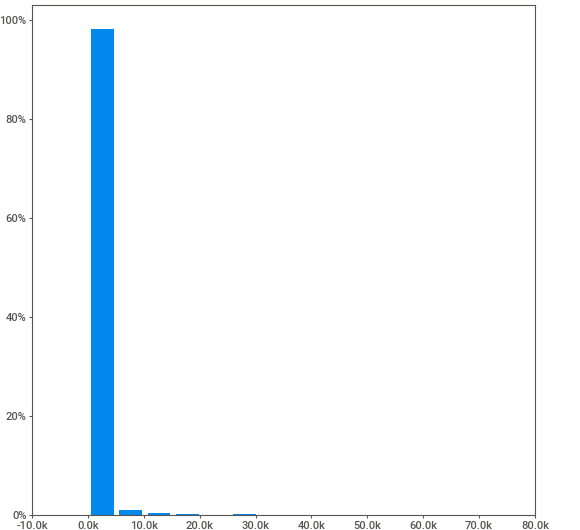
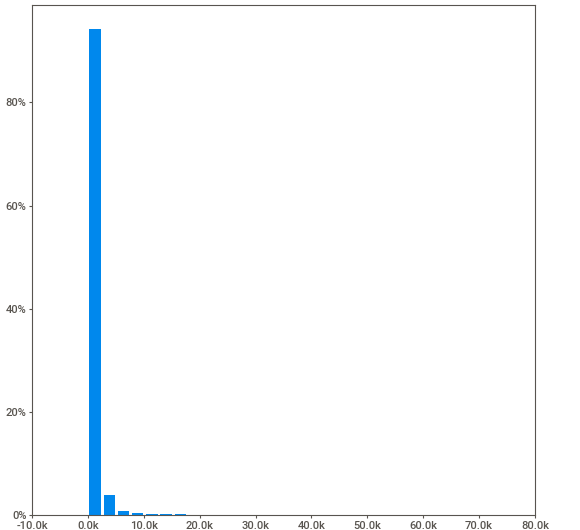
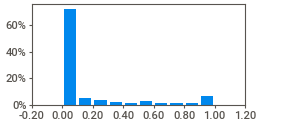
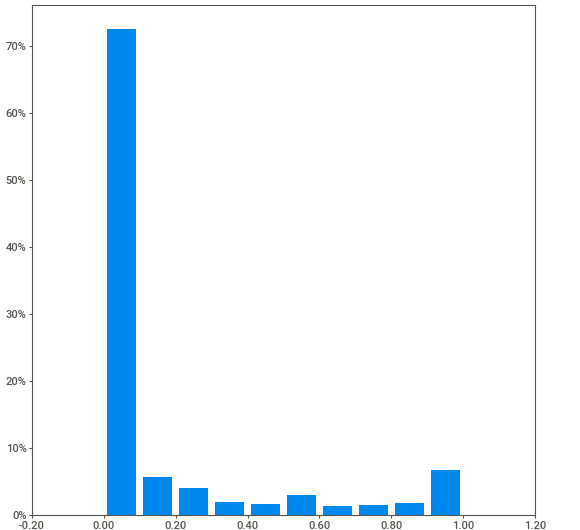
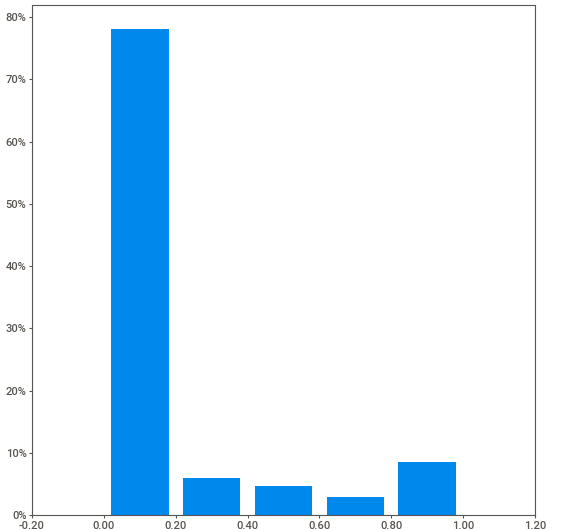
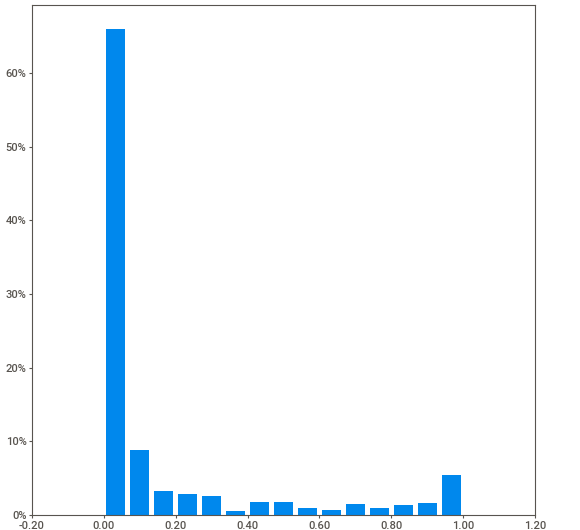
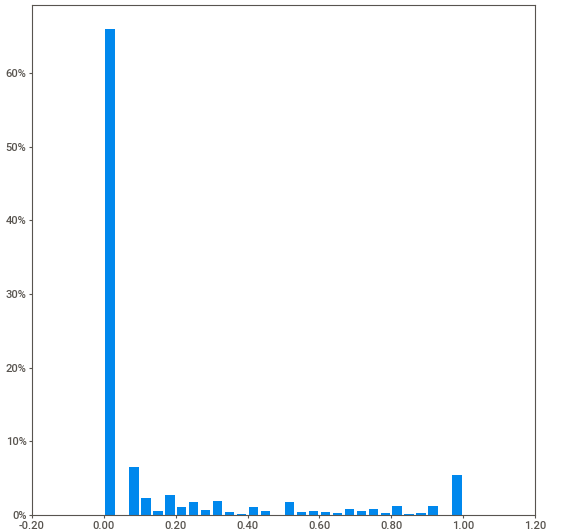
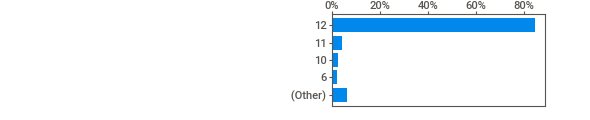
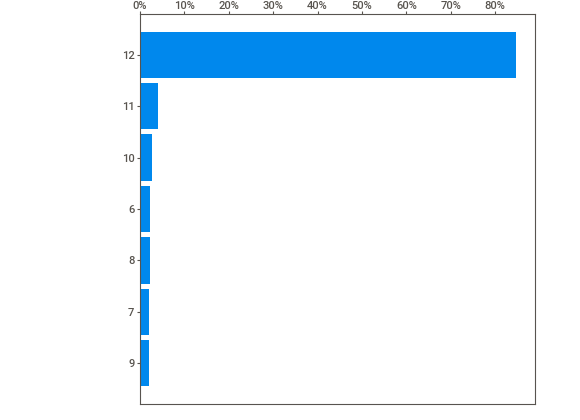
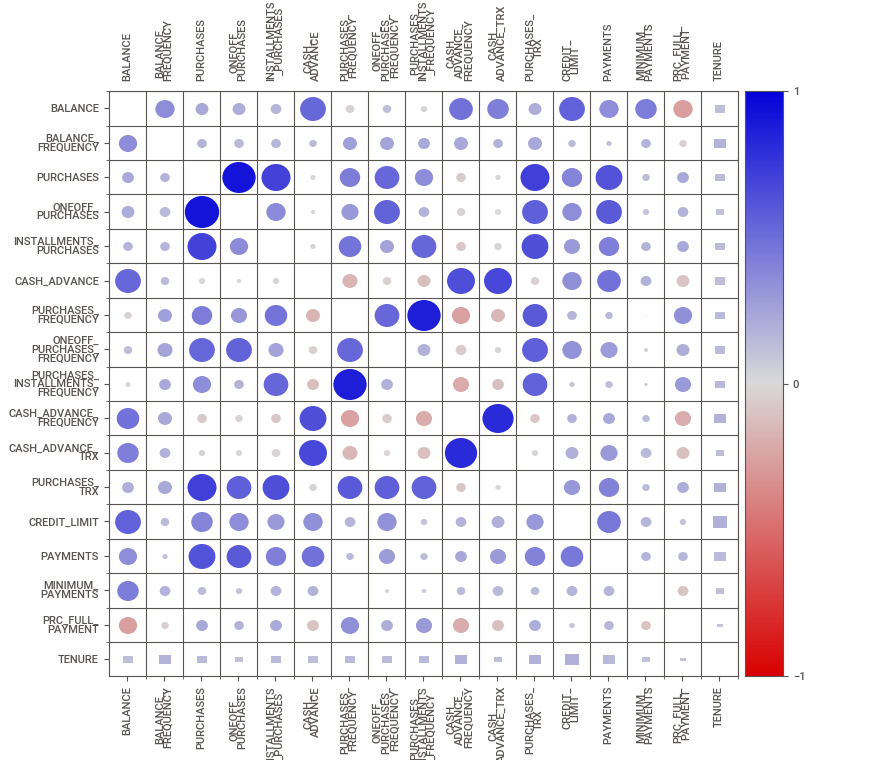
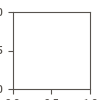

In [57]:
import sweetviz as sv

report = sv.analyze(df)
report.show_notebook()

<Axes: xlabel='TENURE', ylabel='CREDIT_LIMIT'>

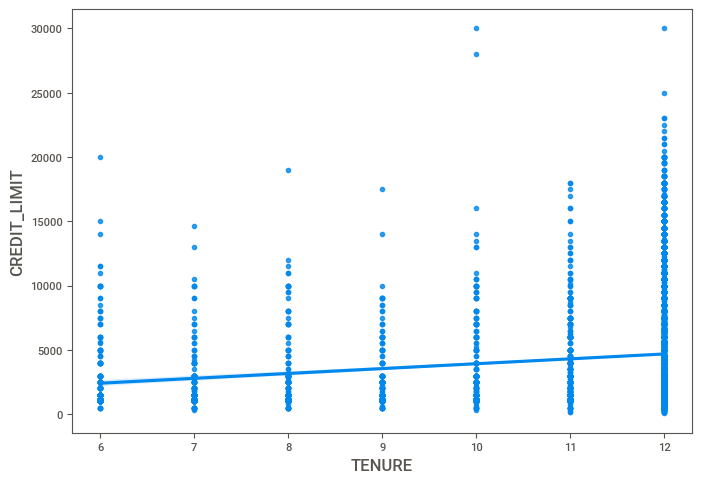

In [58]:
sns.regplot(data = df, y = 'CREDIT_LIMIT', x = 'TENURE')

<Axes: xlabel='PAYMENTS', ylabel='CREDIT_LIMIT'>

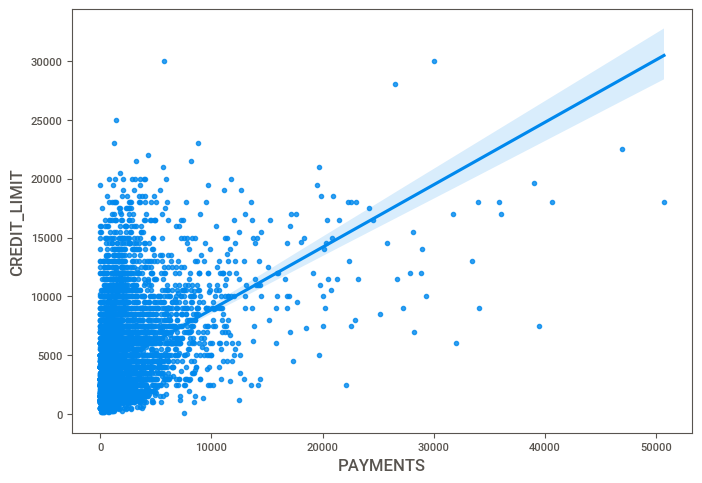

In [59]:
sns.regplot(data = df, y = 'CREDIT_LIMIT', x = 'PAYMENTS')

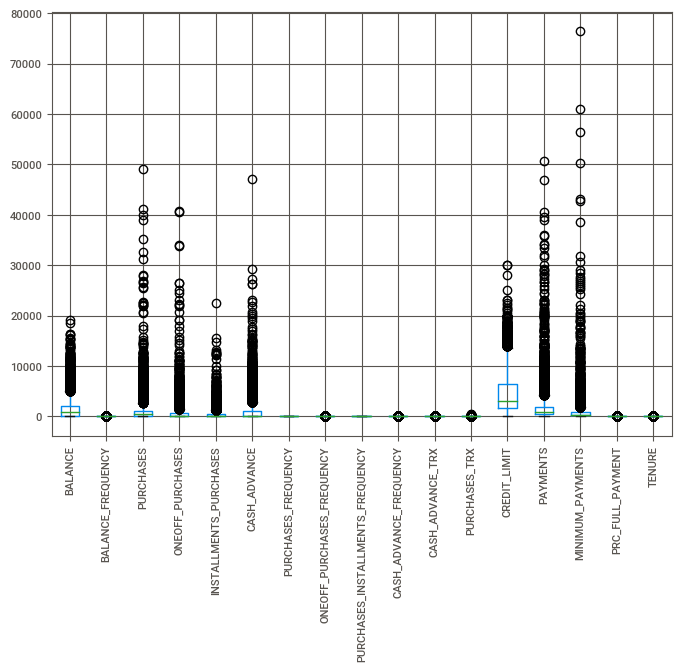

In [60]:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

<Axes: >

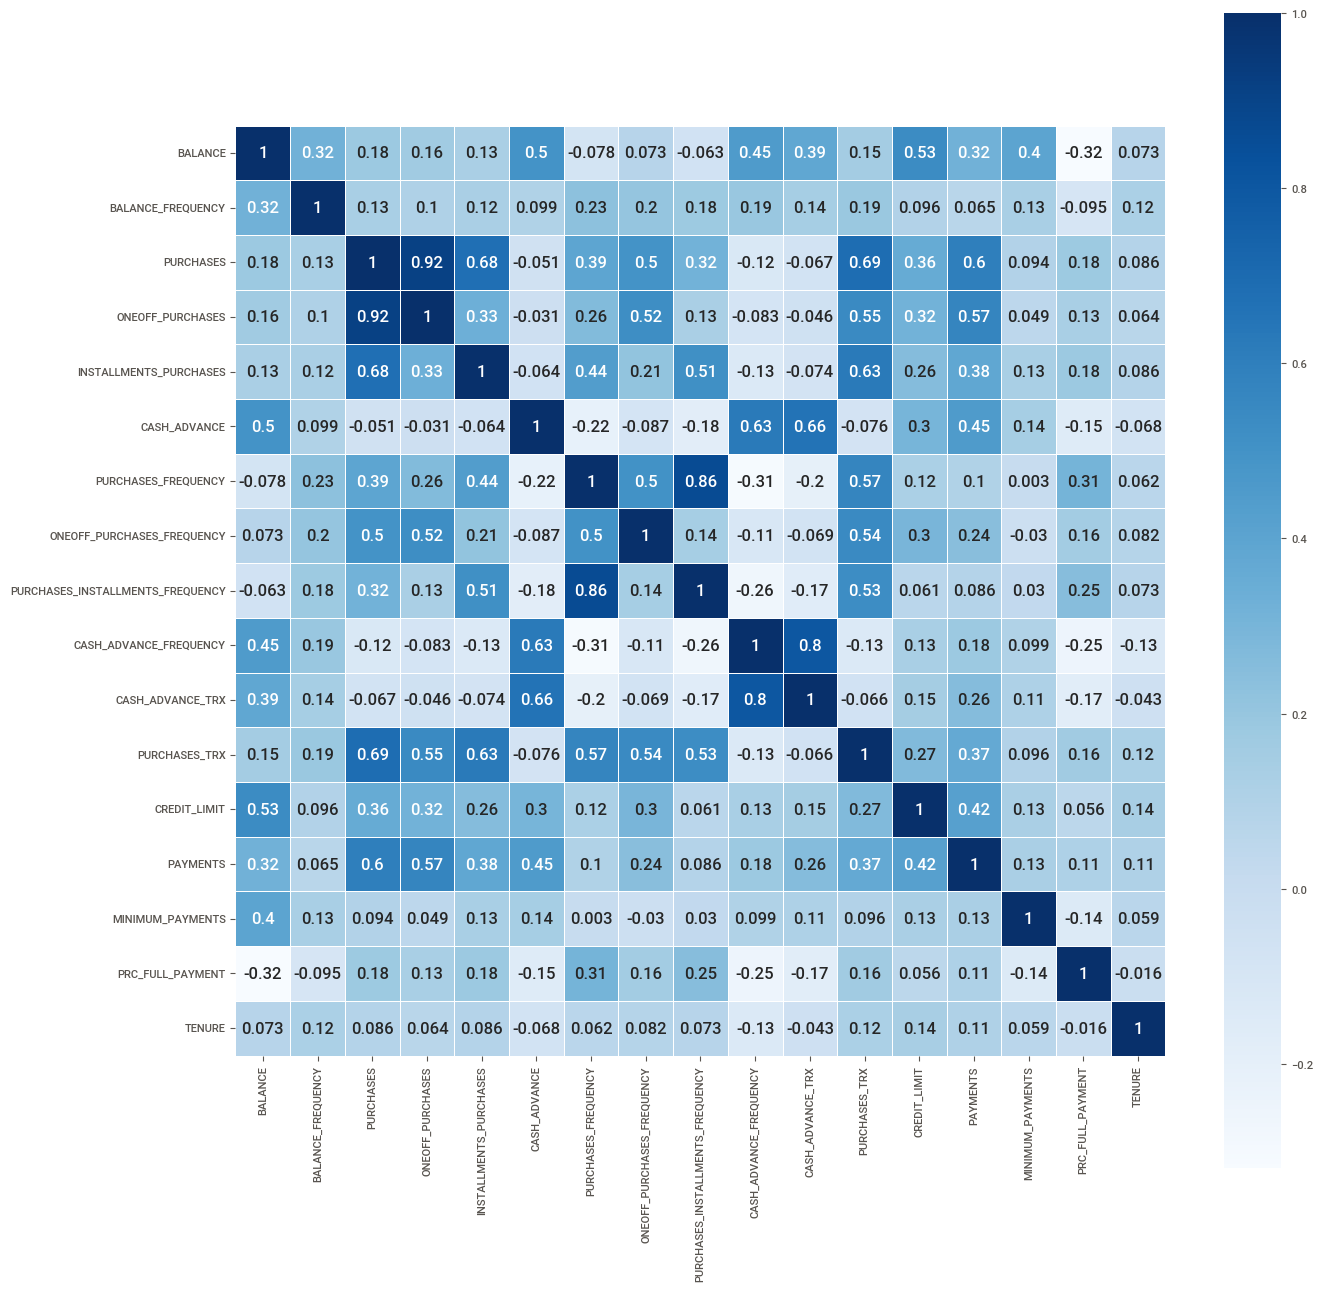

In [61]:
fig = plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), cmap = 'Blues', square = True, annot = True, linewidths = 0.5)

# DATA PREPROCESSING

In [62]:
df.dropna(inplace=True)
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [63]:
df= df.drop(columns=['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY','CUST_ID'],axis=1)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,1333.28,0.000000,0.666667,0.000000,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [64]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

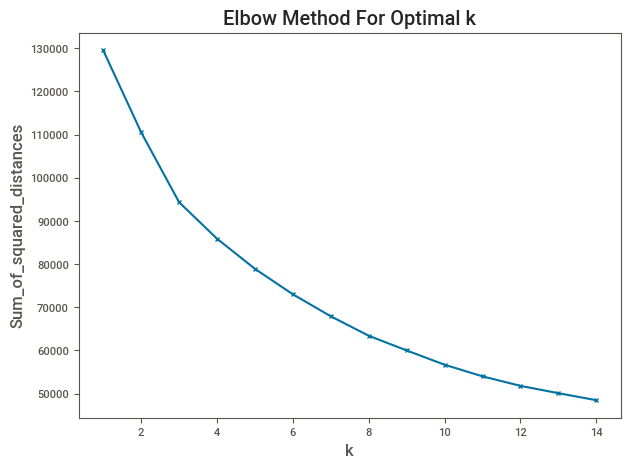

In [65]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_df)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(7,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

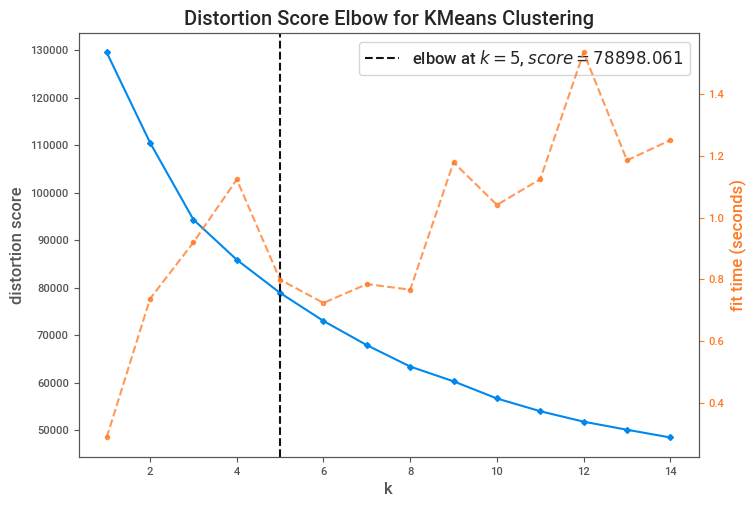

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [66]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(1, 15))
elbow.fit(scaled_df)
elbow.show()

In [67]:
kmeans = KMeans(n_clusters=4).fit(scaled_df)
kmeans.n_clusters
kmeans.cluster_centers_
kmeans.labels_
scaled_df[0:5]

array([[-0.74462486, -0.37004679, -0.42918384, -0.35482593, -0.46865549,
        -0.82076881, -0.68627958, -0.68195251, -0.47943688, -0.51762292,
        -0.96257545, -0.54394191, -0.30550763, -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, -0.45883904,  2.56855647,
        -1.2361389 , -0.68627958,  0.55702219,  0.09925796, -0.59705416,
         0.67720406,  0.79685226,  0.08768873,  0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, -0.45883904, -0.46865549,
         1.25607662,  2.6466512 , -0.68195251, -0.47943688, -0.12046673,
         0.81385235, -0.39950328, -0.09990611, -0.53772694,  0.35518066],
       [-0.37391041,  0.50540465, -0.46582465, -0.45883904, -0.46865549,
        -1.0284551 , -0.40853646, -0.68195251, -0.47943688, -0.55733854,
        -0.90791614, -0.3801648 , -0.26113056, -0.53772694,  0.35518066],
       [ 0.09955087,  0.50540465,  0.14206212,  0.99481504, -0.46865549,
         0.42533895, -0.68627958, -0.68195251, 

In [68]:
clusters_kmeans = kmeans.labels_

df["Labels"] = clusters_kmeans

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,0
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,2
5,1809.828751,1.000000,1333.28,1333.28,0.000000,0.666667,0.000000,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0


In [69]:
df['Labels'].value_counts()

2    3905
0    3183
1    1240
3     308
Name: Labels, dtype: int64